In [81]:
import numpy as np 
from IPython.display import display
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

#import scikitlearn

df = pd.read_csv('/Users/finnwethall/Downloads/credit_risk_dataset.csv')

display(df)

rows, cols = df.shape
#print(rows)

print(df.isna().sum())



NameError: name 'warnings' is not defined

In [83]:
#some preprocessing
#drop improper employment length data
#df = df[df['person_age'] > df['person_emp_length']]
#make sure loan_percent_income is defined properly
df = df[df['person_age'] < 144]
df = df[df['person_emp_length'] < 123]

#fillna columns
df['person_emp_length'].fillna(df['person_emp_length'].mean())
df['loan_int_rate'].fillna(df['loan_int_rate'].mean())
#print(df.isna().sum())

display(df)
unique_ownership_vals = np.unique(df['person_home_ownership'])
unique_loan_intent = np.unique(df['loan_intent'])




,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


([<matplotlib.patches.Wedge at 0x16a2582c0>,
 [Text(-0.6423914587689787, 0.8929351676917332, 'EDUCATION'),
  Text(-1.062675865238309, -0.28411266328696344, 'MEDICAL'),
  Text(-0.19046988113454488, -1.0833841536503073, 'VENTURE'),
  Text(0.867731813573017, -0.6760484447976217, 'PERSONAL'),
  Text(1.0245596420945893, 0.4003467744231335, 'DEBTCONSOLIDATION'),
  Text(0.37518552301262287, 1.0340385985647464, 'HOMEIMPROVEMENT')],
 [Text(-0.3503953411467156, 0.4870555460136726, '19.9%'),
  Text(-0.5796413810390776, -0.15497054361107093, '18.6%'),
  Text(-0.10389266243702448, -0.5909368110819857, '17.5%'),
  Text(0.4733082619489183, -0.3687536971623391, '16.9%'),
  Text(0.5588507138697759, 0.2183709678671637, '16.0%'),
  Text(0.2046466489159761, 0.5640210537625888, '11.1%')])

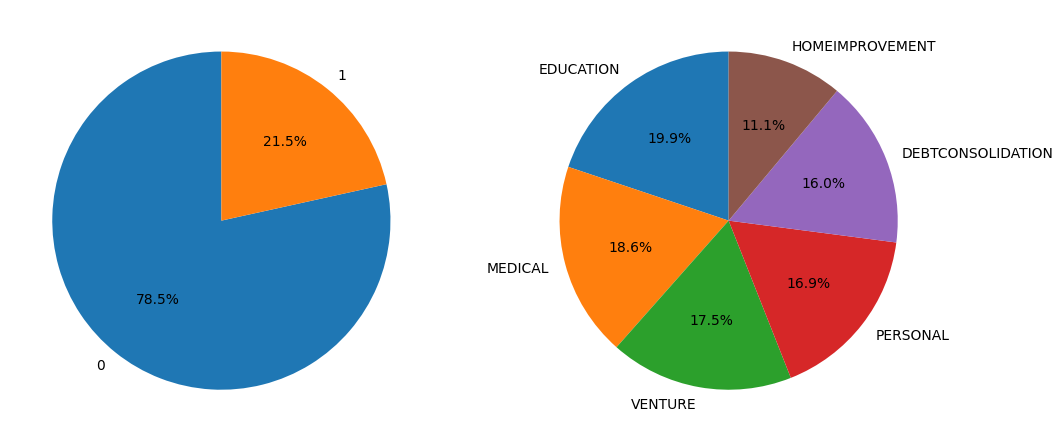

In [85]:
#EDA
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('loan_grade')['loan_status'].mean() #where ~1 => high default, ~0 => low default

axs[0].pie(df['loan_status'].value_counts(), labels = df['loan_status'].value_counts().index, autopct='%1.1f%%', startangle=90)

axs[1].pie(df['loan_intent'].value_counts(), labels = df['loan_intent'].value_counts().index, autopct='%1.1f%%', startangle=90)

/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_75400/2140906117.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df['loan_status'], estimator='mean', ci=None, hue=df[col])


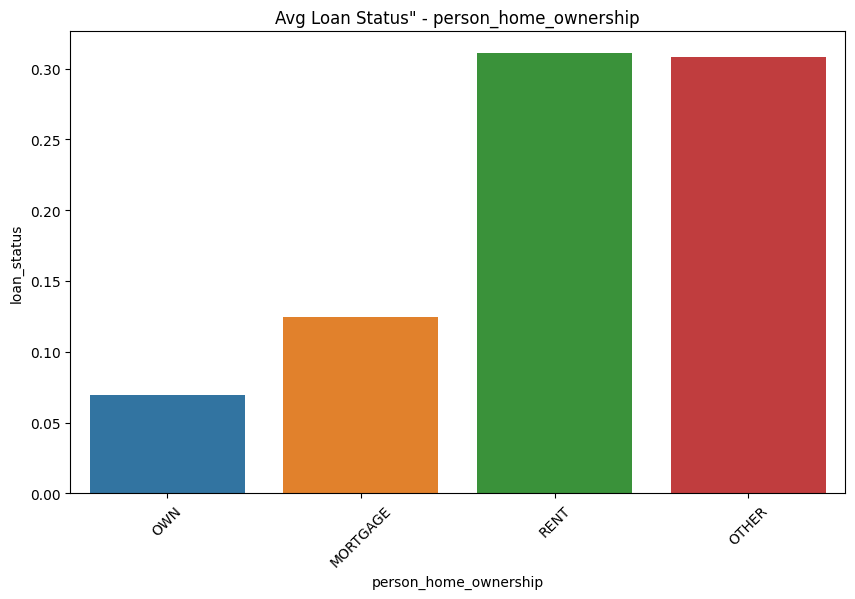

/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_75400/2140906117.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df['loan_status'], estimator='mean', ci=None, hue=df[col])


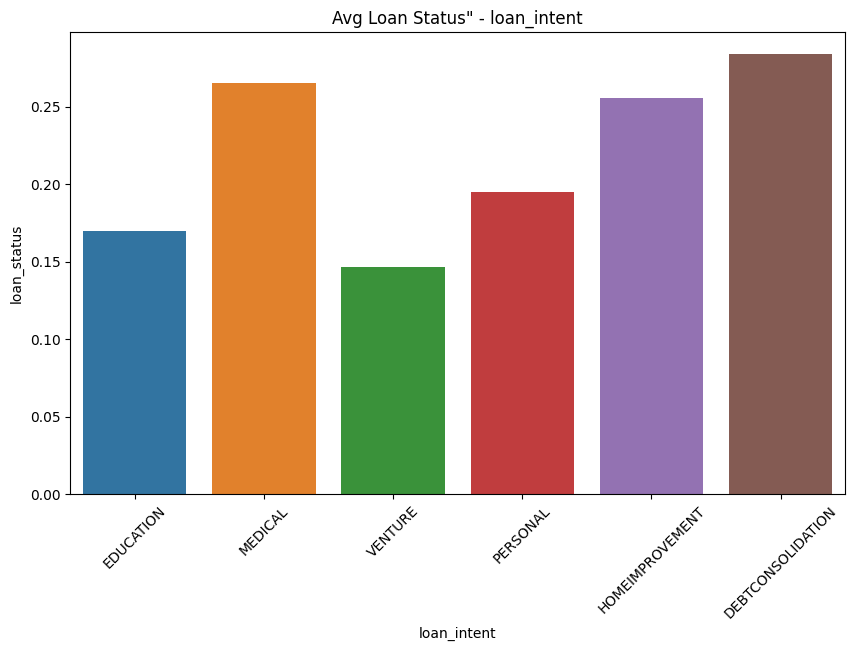

/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_75400/2140906117.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df['loan_status'], estimator='mean', ci=None, hue=df[col])


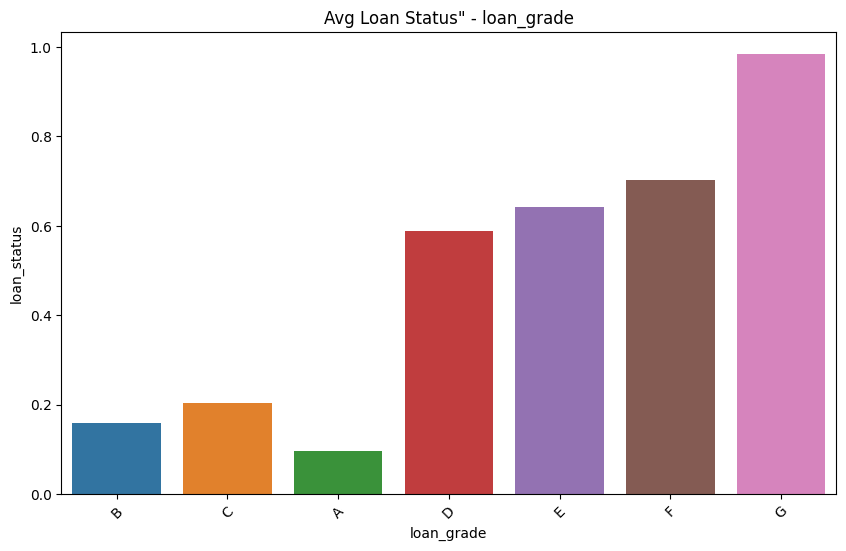

/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_75400/2140906117.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df['loan_status'], estimator='mean', ci=None, hue=df[col])


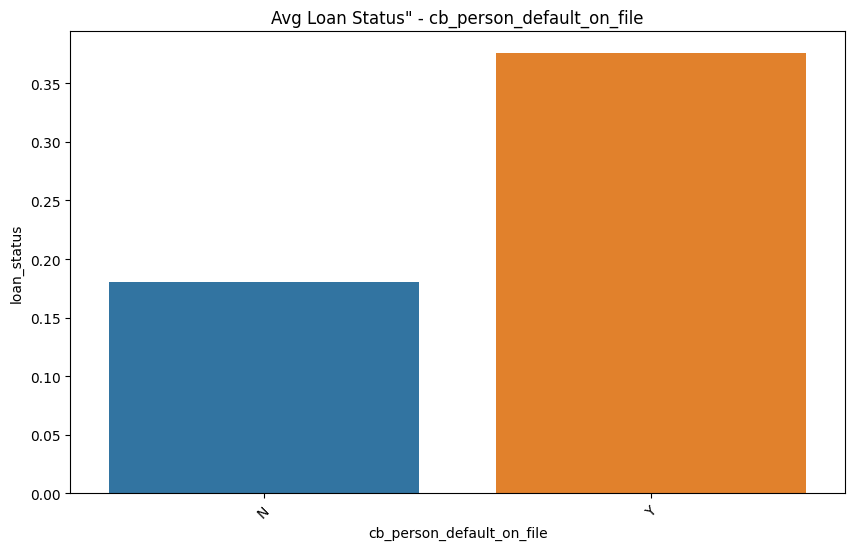

In [87]:
#EDA for cat data

category_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in category_cols:
    plt.figure(figsize=(10, 6))

    sns.barplot(x=df[col], y=df['loan_status'], estimator='mean', ci=None, hue=df[col])

    plt.title(f'Avg Loan Status" - {col}')
    plt.xticks(rotation=45)
    plt.show()


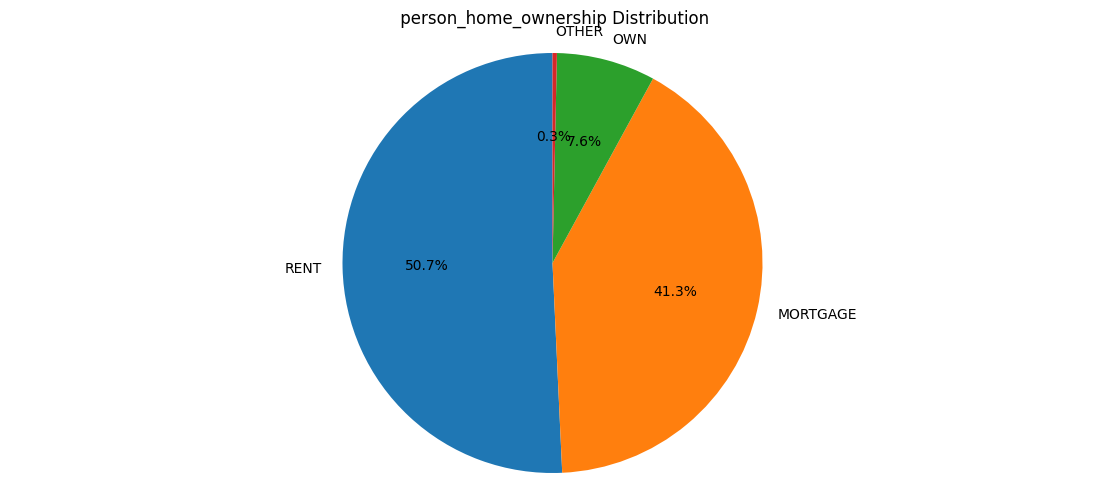

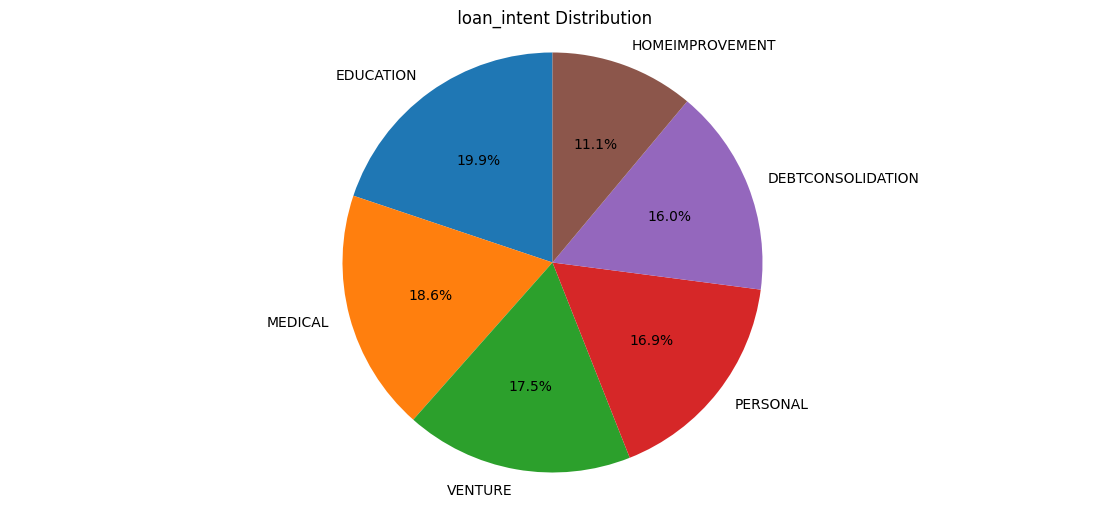

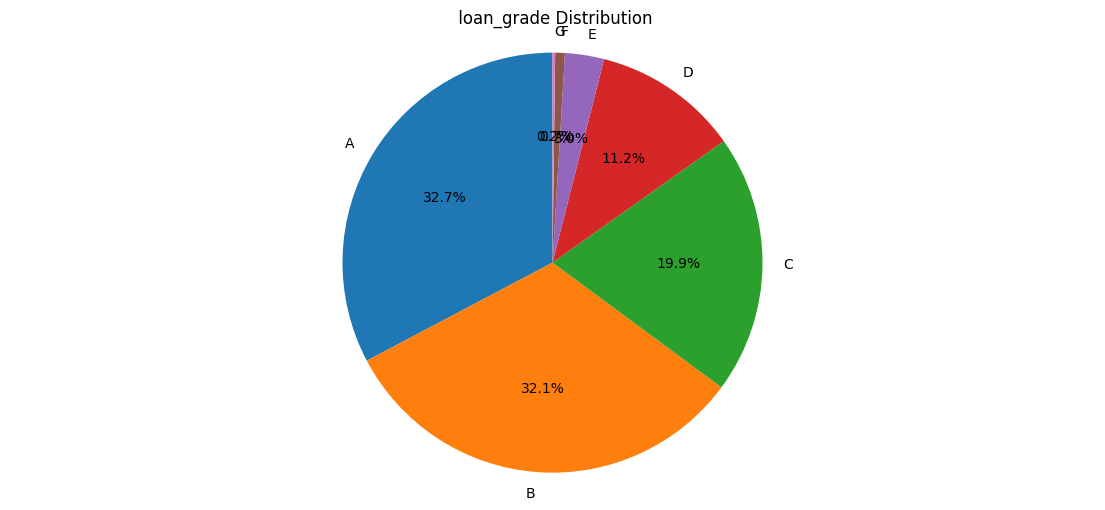

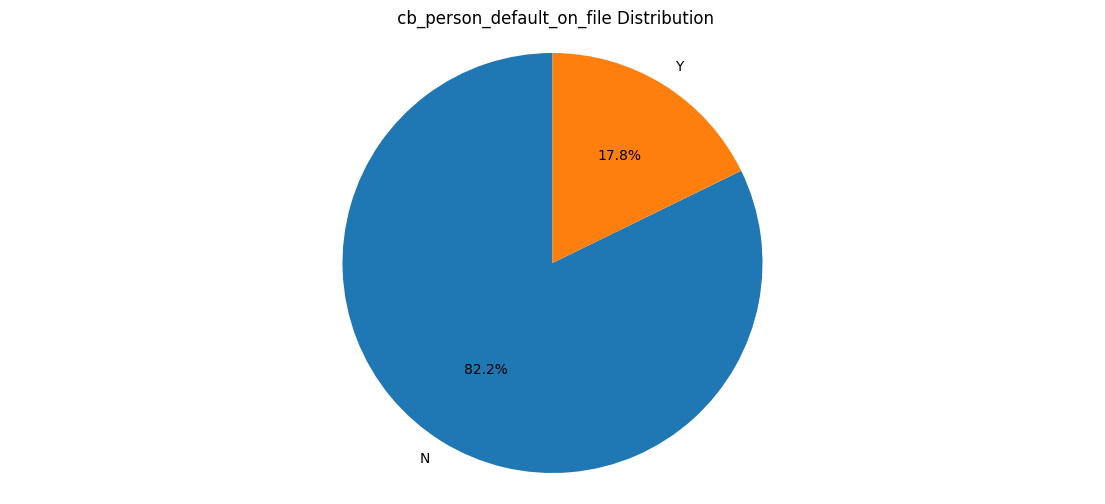

In [88]:
#EDA for cat contd. 

for col in category_cols:
    fig, axs = plt.subplots(1, 1, figsize=(14, 6))
    
    axs.pie(df[col].value_counts(), labels=df[col].value_counts().index,autopct='%1.1f%%', startangle=90)
    axs.set_title(f' {col} Distribution')
    axs.axis('equal')  
    plt.show()
    
    


In [90]:
display(df)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


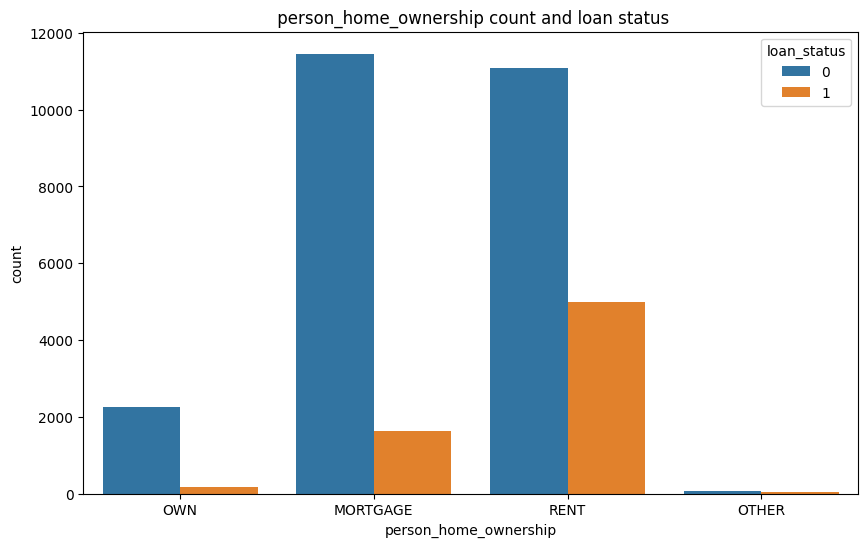

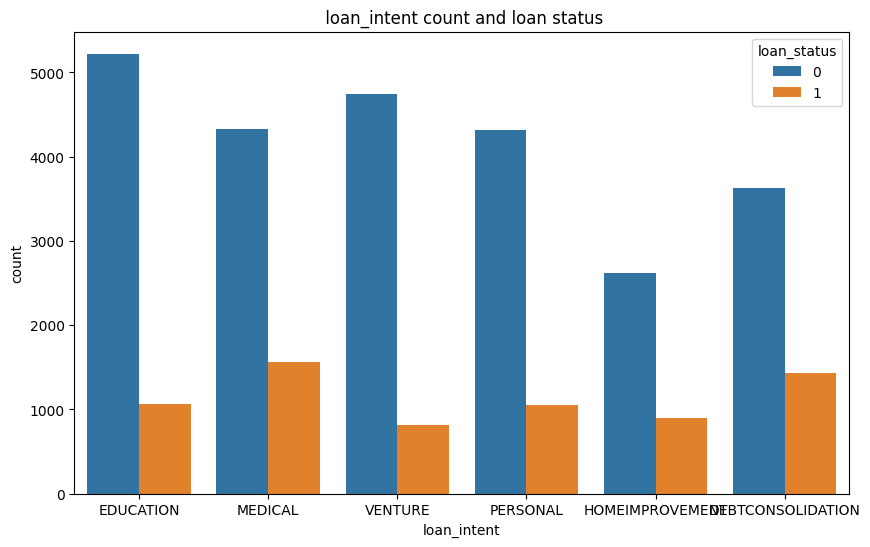

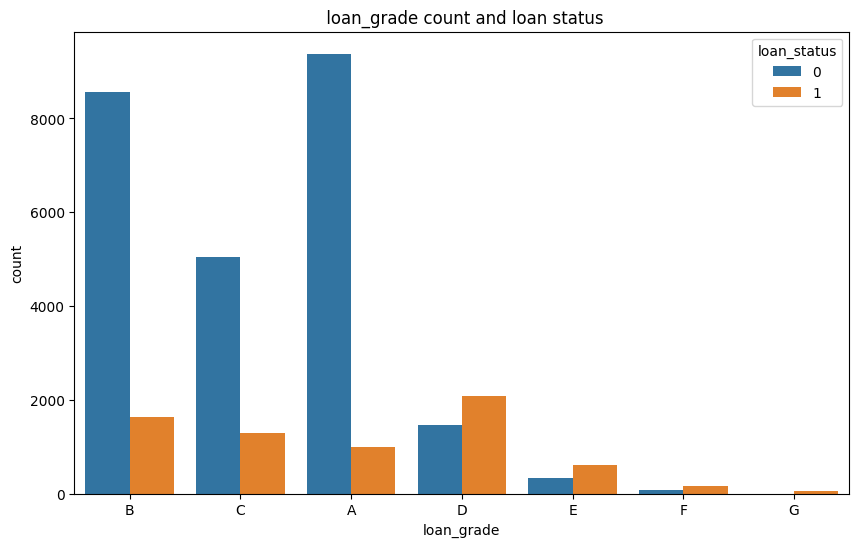

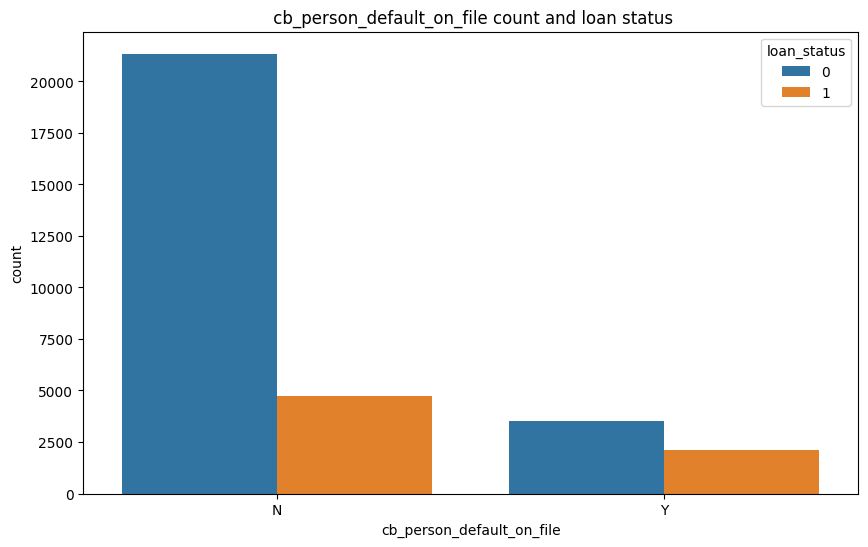

In [93]:
df.groupby('loan_grade')['loan_amnt'].mean()


for col in category_cols:

    plt.figure(figsize=(10, 6))

    sns.countplot(data=df, x=col, hue='loan_status')
    plt.title(f' {col} count and loan status')
    plt.show()

    

In [94]:
#EDA for numeric Columns


num_cols = [col for col in df.columns if df[col].dtype != 'object']
nums_to_drop = ["id","loan_status"]
num_cols  = [col for col in num_cols if col not in nums_to_drop]

df[num_cols]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
1,21,9600,5.0,1000,11.14,0.10,2
2,25,9600,1.0,5500,12.87,0.57,3
3,23,65500,4.0,35000,15.23,0.53,2
4,24,54400,8.0,35000,14.27,0.55,4
5,21,9900,2.0,2500,7.14,0.25,2
...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30
32577,54,120000,4.0,17625,7.49,0.15,19
32578,65,76000,3.0,35000,10.99,0.46,28
32579,56,150000,5.0,15000,11.48,0.10,26


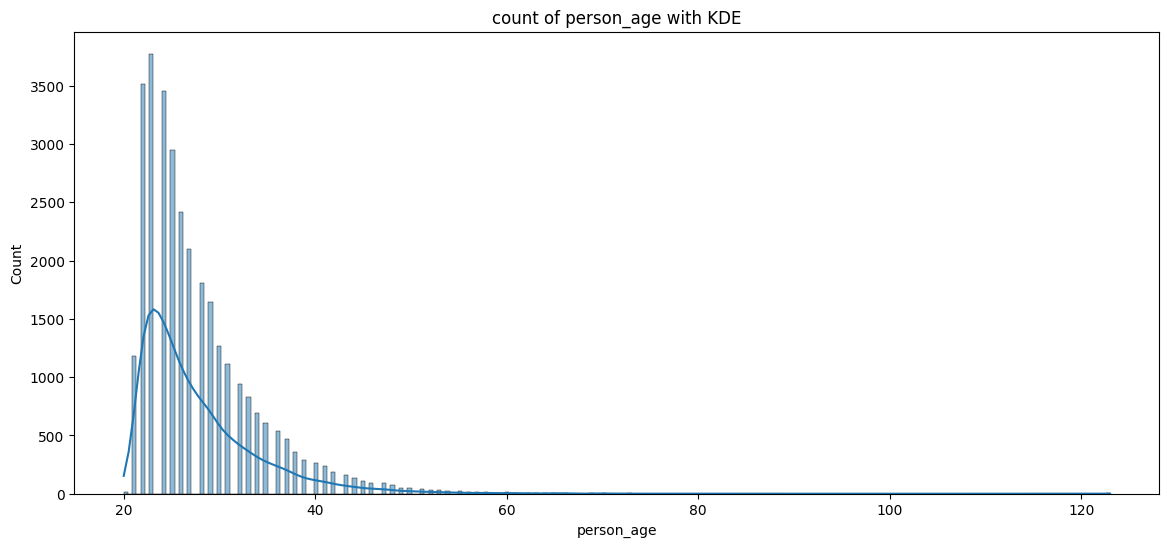

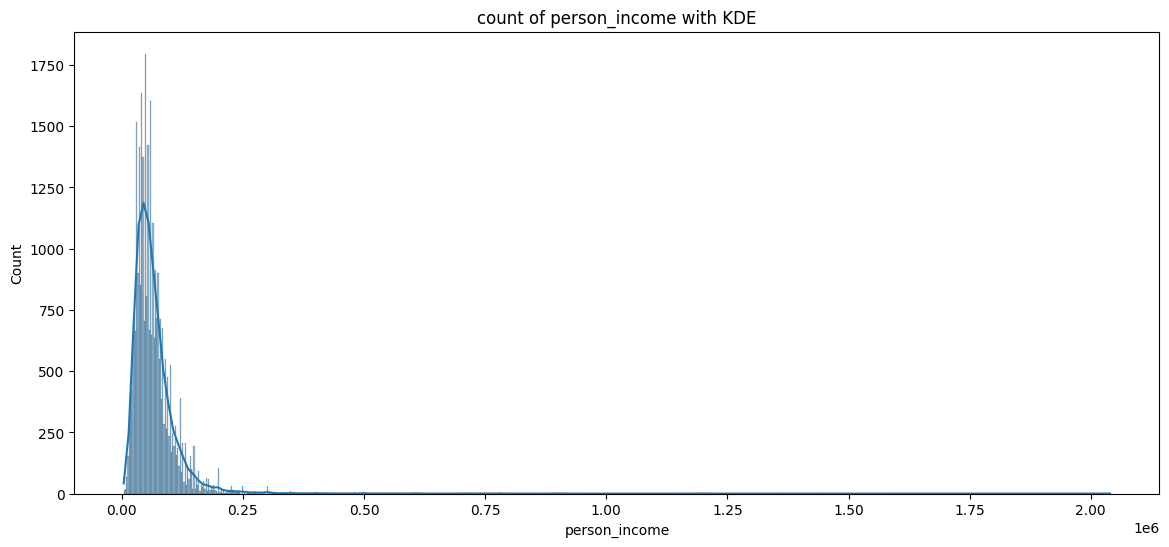

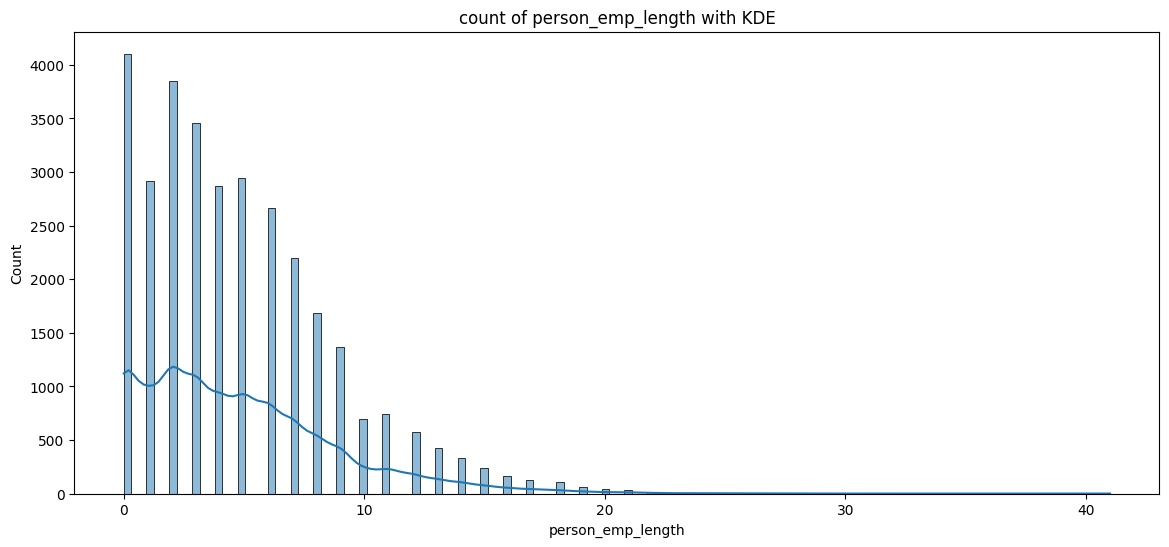

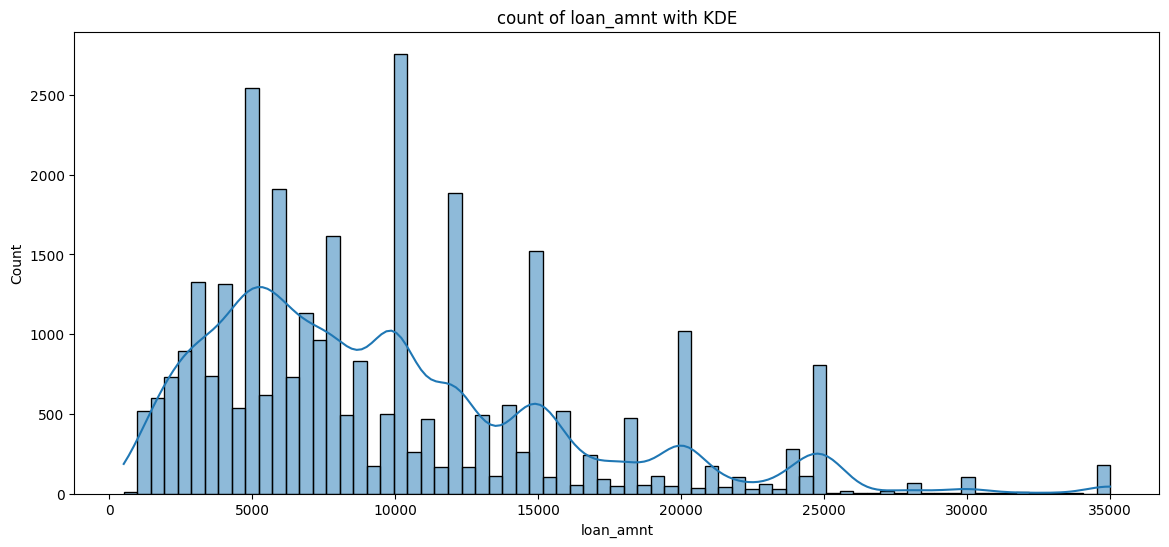

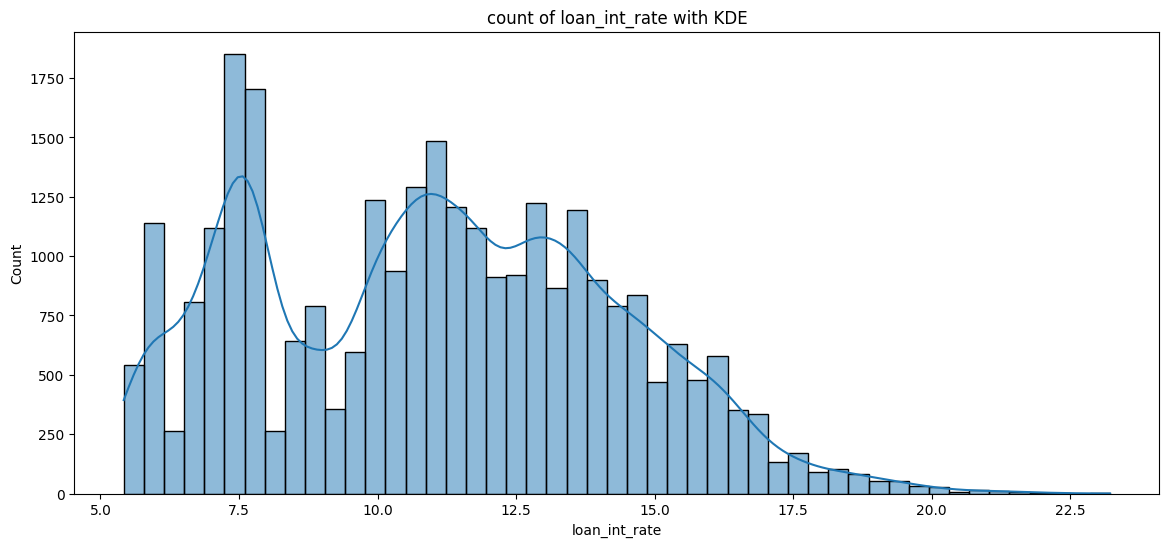

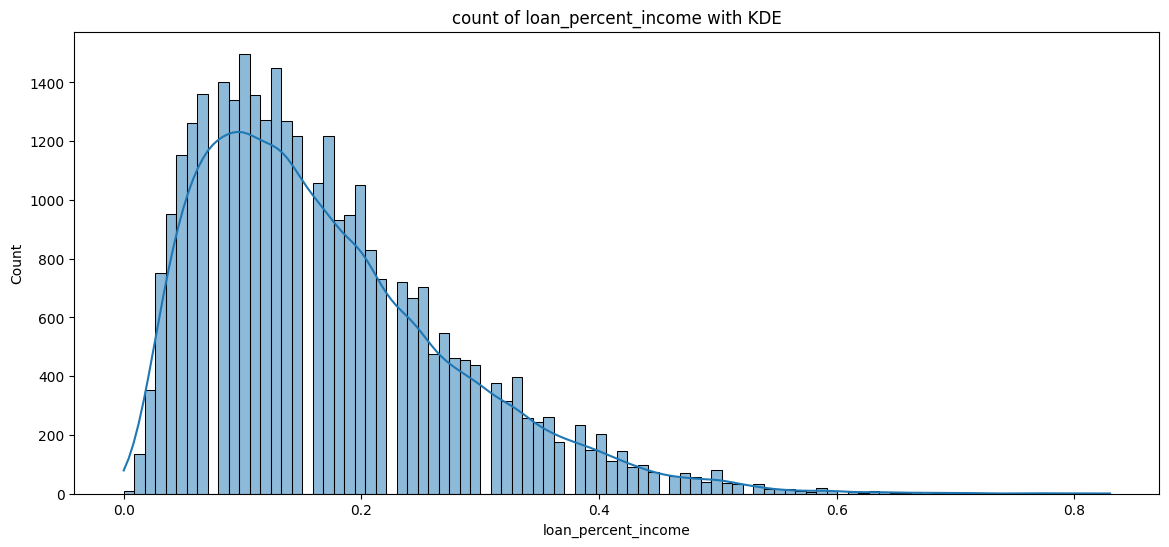

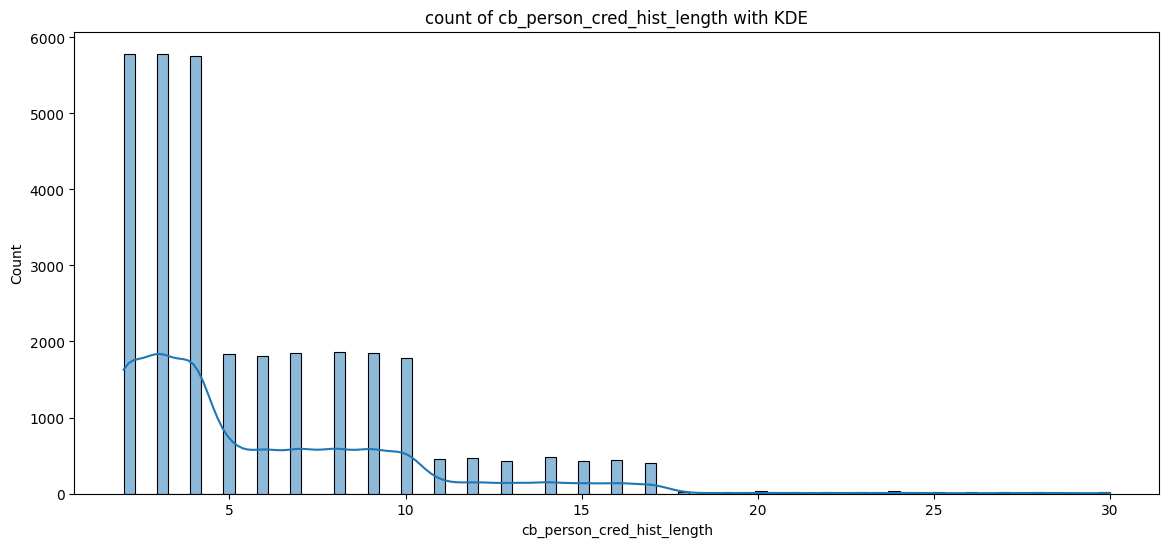

In [97]:
for col in num_cols:

    fig, axs = plt.subplots(1, 1, figsize=(14, 6))

    sns.histplot(data=df, x=col, kde=True, ax=axs)
    plt.title(f'count of {col} with KDE')

    
    
    plt.show()


#DO I NEED POWER TRANSFORM??

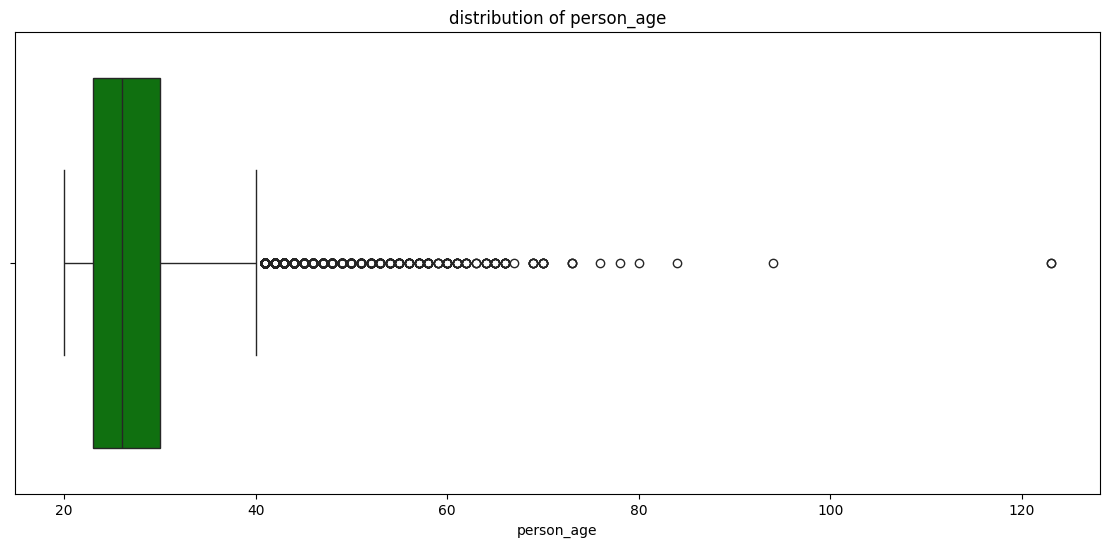

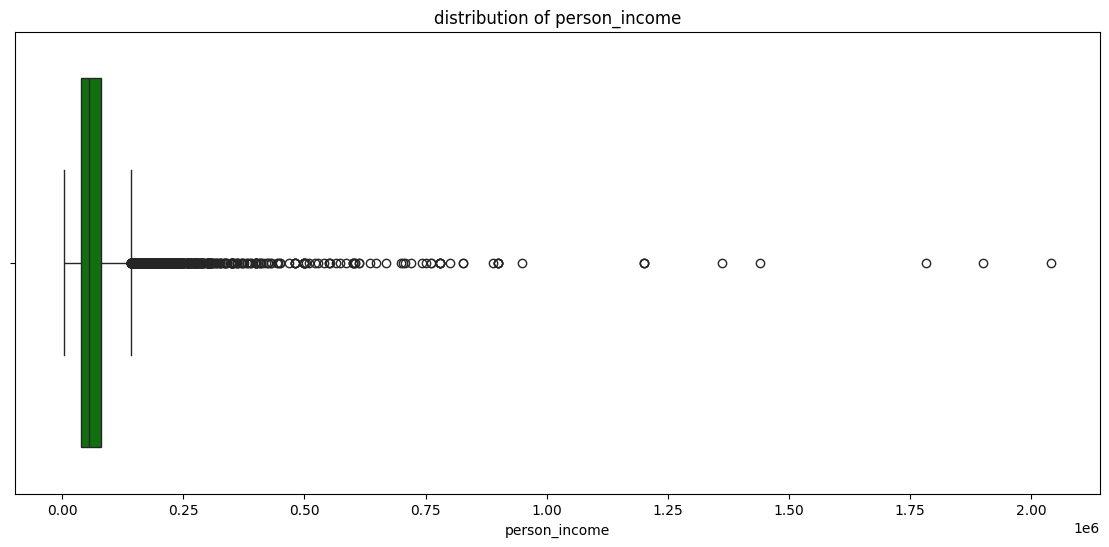

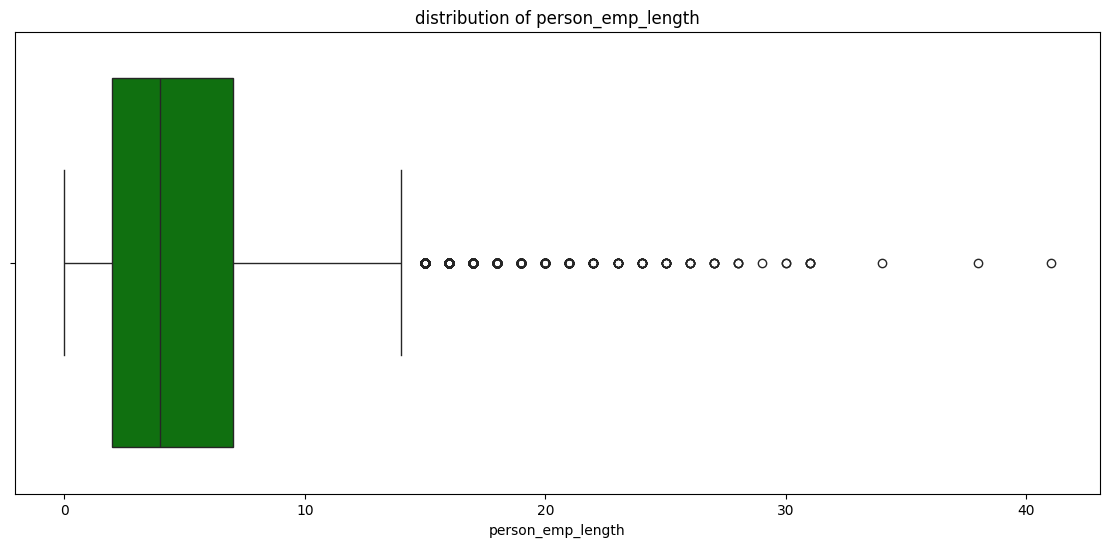

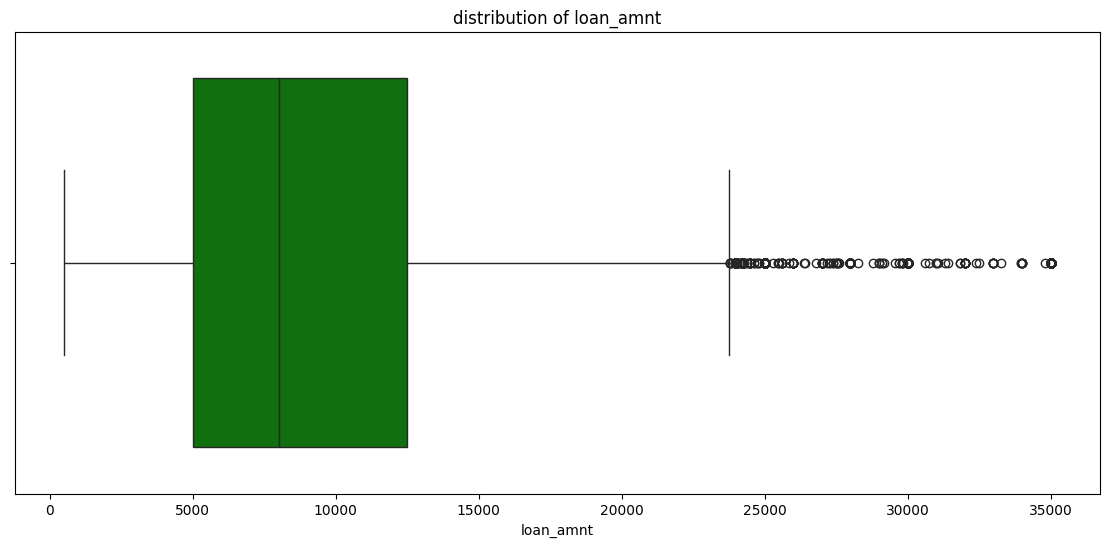

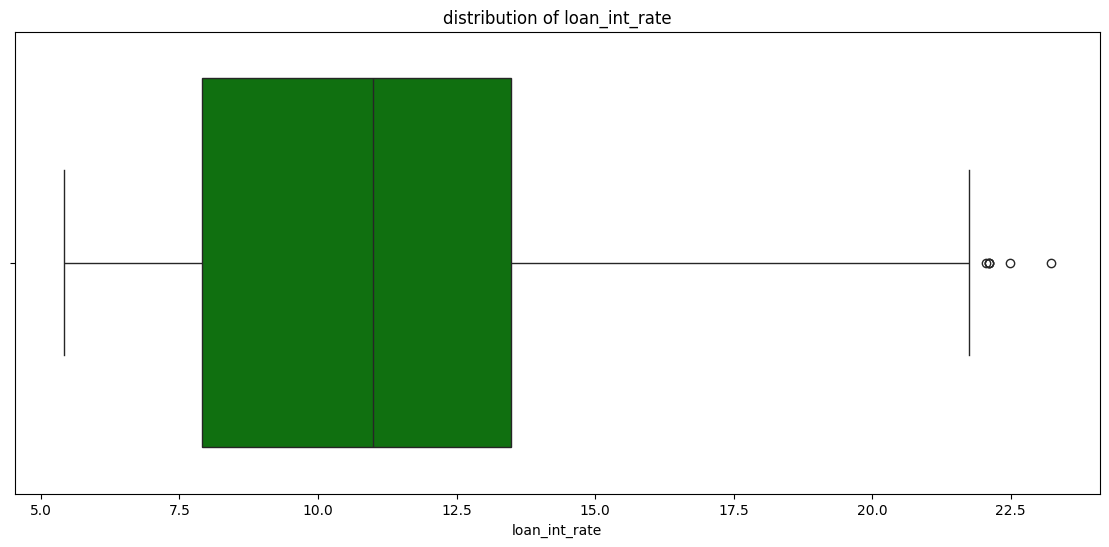

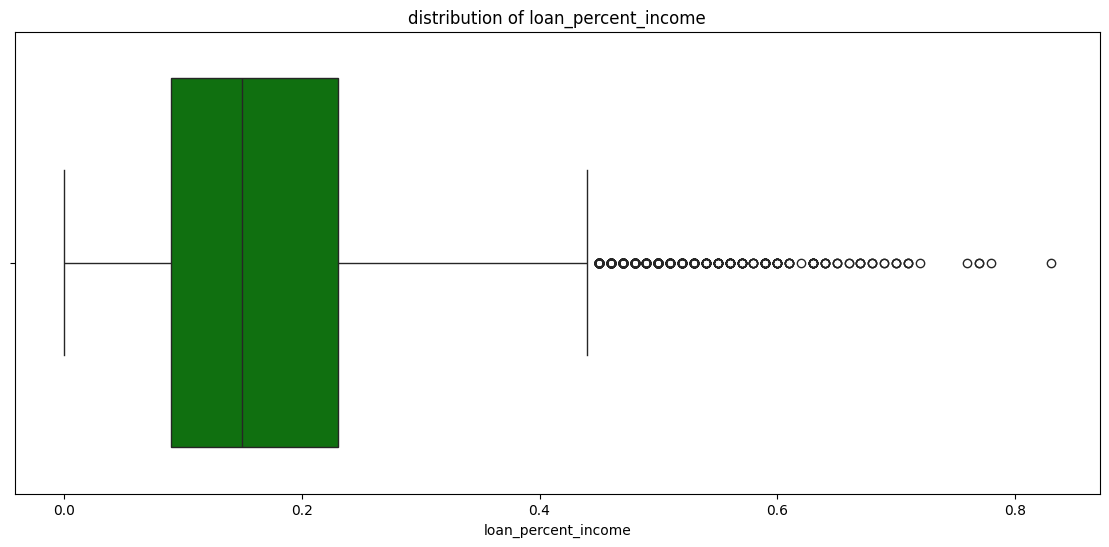

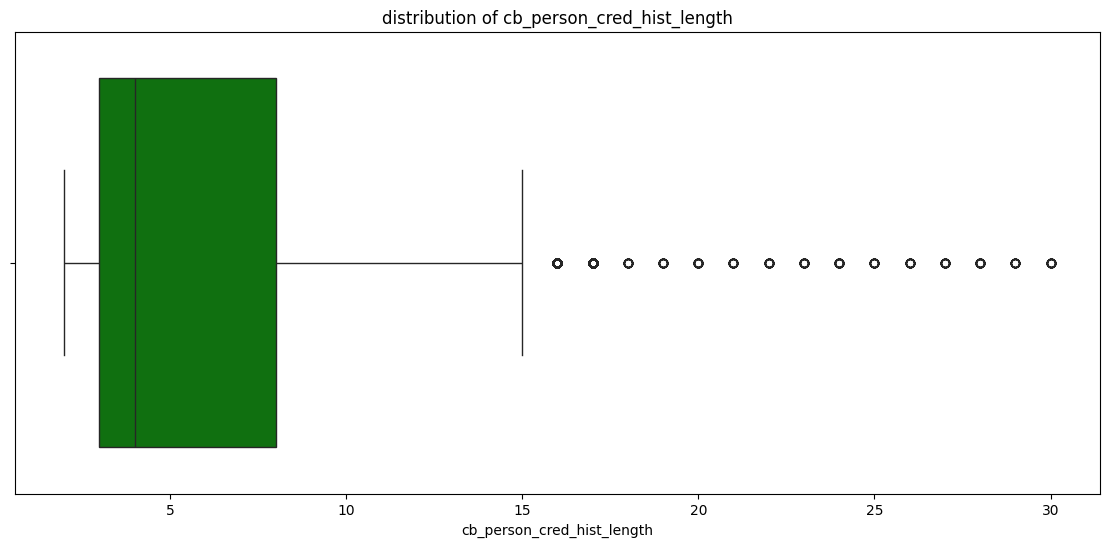

In [98]:
for col in num_cols:
    fig, axs = plt.subplots(1, 1, figsize=(14, 6))

    sns.boxplot(data=df, x=col, ax=axs, color='green')
    plt.title(f'distribution of {col}')
    plt.show()
    

In [99]:
#correlation map
display(df)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [107]:
#encoding 
corr_df = df.copy()
print(np.unique(corr_df['person_home_ownership']))
print(np.unique(corr_df['loan_intent']))
print(np.unique(corr_df['loan_grade']))
print(np.unique(corr_df['cb_person_default_on_file']))



corr_df['person_home_ownership'].replace({'MORTGAGE':0, 'OTHER':1, 'OWN':2, 'RENT':3}, inplace=True)
print(np.unique(corr_df['person_home_ownership']))

corr_df['loan_intent'].replace({'DEBTCONSOLIDATION':0, 'EDUCATION':1, 'HOMEIMPROVEMENT':2, 'MEDICAL':3, 'PERSONAL':4, 'VENTURE':5}, inplace=True)
corr_df['loan_grade'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}, inplace=True)
corr_df['cb_person_default_on_file'].replace({'N':0, 'Y':1}, inplace=True)



['MORTGAGE' 'OTHER' 'OWN' 'RENT']
['DEBTCONSOLIDATION' 'EDUCATION' 'HOMEIMPROVEMENT' 'MEDICAL' 'PERSONAL'
 'VENTURE']
['A' 'B' 'C' 'D' 'E' 'F' 'G']
['N' 'Y']
[0 1 2 3]


/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_75400/336864854.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  corr_df['person_home_ownership'].replace({'MORTGAGE':0, 'OTHER':1, 'OWN':2, 'RENT':3}, inplace=True)
/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_75400/336864854.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set

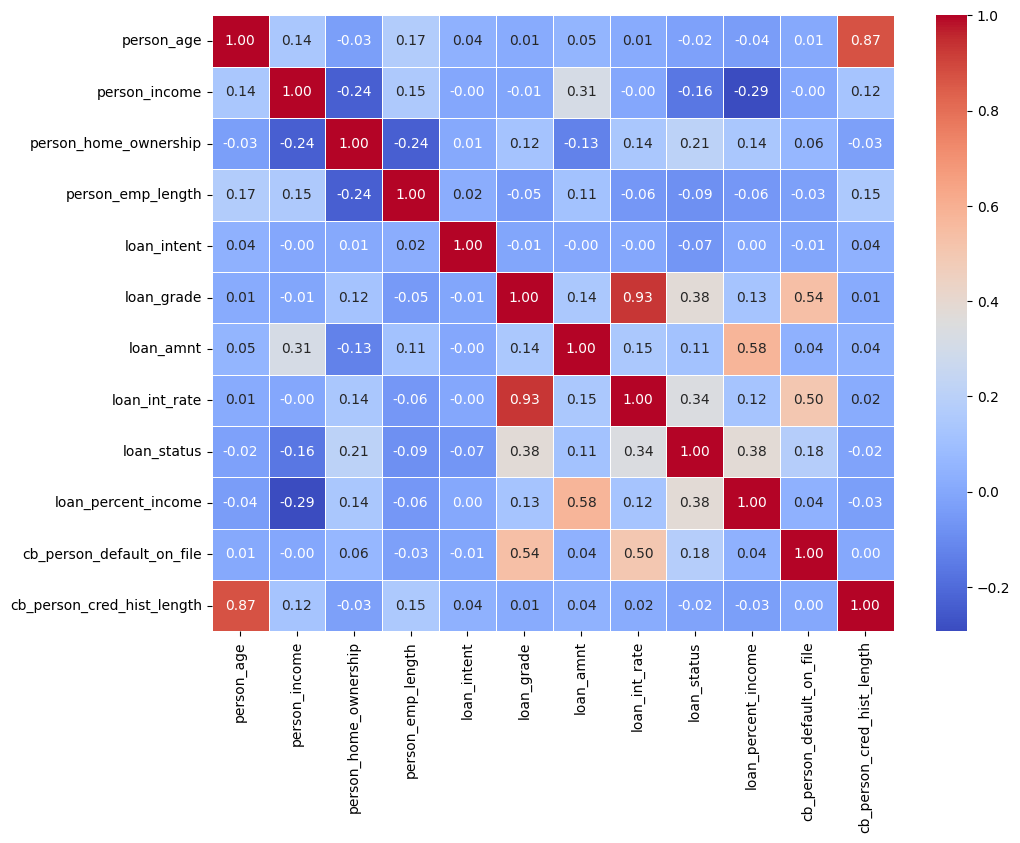

In [101]:
#make the corr matrix

corr_matrix = corr_df.corr()
plt.figure(figsize=(11, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.6)
plt.show()


In [117]:
#risky entries


df['risky'] = (np.where((df['cb_person_default_on_file'] == 'Y') & (df['loan_grade'].isin(['D','E','F','G'])), 1, 0))

display(df[df['risky'] == True])


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,risky
21,25,137000,RENT,9.0,PERSONAL,E,34800,16.77,0,0.25,Y,2,1
24,22,80000,RENT,3.0,PERSONAL,D,33950,14.54,1,0.42,Y,4,1
26,21,11000,MORTGAGE,3.0,VENTURE,E,4575,17.74,1,0.42,Y,3,1
37,24,64000,RENT,8.0,DEBTCONSOLIDATION,D,30000,14.54,1,0.47,Y,3,1
38,25,75000,RENT,4.0,HOMEIMPROVEMENT,D,30000,16.89,1,0.40,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32474,55,75000,MORTGAGE,6.0,PERSONAL,D,7700,14.84,0,0.10,Y,18,1
32498,61,78000,MORTGAGE,1.0,PERSONAL,D,8525,14.54,1,0.11,Y,27,1
32555,51,80000,RENT,3.0,HOMEIMPROVEMENT,F,18000,18.78,0,0.23,Y,20,1
32563,52,71520,RENT,0.0,EDUCATION,E,7000,16.82,1,0.10,Y,24,1


In [183]:
#category conversion
print(df.dtypes)
#bool for lgbm
def convert_to_cat(df, lgbm=False):

    df_copy = df.copy()

    for col in df.columns:
        if df[col].dtype == 'object':
            df_copy[col] = df_copy[col].astype('category')
        else:
            if not lgbm:
                print(lgbm)
                df_copy[col] = df_copy[col].astype('string').astype('category')

    return df_copy


df_as_cat_lgbm = convert_to_cat(df, True)

df_as_cat_lgbm.dtypes


    

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
risky                           int64
dtype: object


person_age                       int64
person_income                    int64
person_home_ownership         category
person_emp_length              float64
loan_intent                   category
loan_grade                    category
loan_amnt                        int64
loan_int_rate                  float64
loan_status                      int64
loan_percent_income            float64
cb_person_default_on_file     category
cb_person_cred_hist_length       int64
risky                            int64
dtype: object